In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
#read data using scipy (data is in matlab matrix format)
import scipy.io
df = scipy.io.loadmat('ex5data1.mat')
print(type(df))

<class 'dict'>


In [3]:
#let us look at keys in data
df.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
# the dataset containing historical records on the change in the water level, x, 
#and the amount of water flowing out of the dam, y

#This dataset is divided into three parts: A training set that your model will learn on: X, y

X = df['X'] #this is an array
y = df['y']

print(X.shape)
print(y.shape)

(12, 1)
(12, 1)


In [5]:
#A cross validation set for determining the regularization parameter: Xval, yval

Xval = df['Xval']
yval = df['yval']

print(Xval.shape)
print(yval.shape)

(21, 1)
(21, 1)


In [6]:
#A test set for evaluating performance. These are “unseen” examples 
#which your model did not see during training: Xtest, ytest

Xtest = df['Xtest']
ytest = df['ytest']

print(Xtest.shape)
print(ytest.shape)

(21, 1)
(21, 1)


### Regularized Linear Regression

### Visualize Dataset

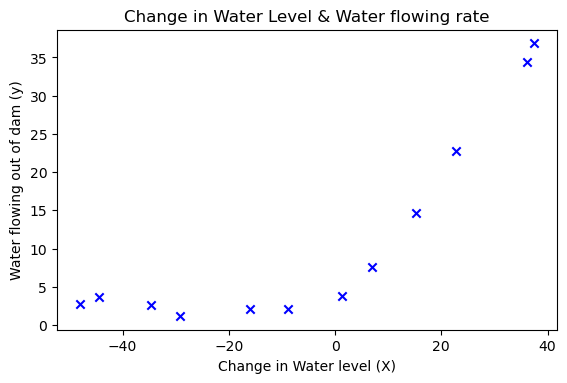

In [7]:
#looking at scatter plot, it looks like polynomial features should help
#But first let us try linear regression, later we will create polynomila features

fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = X, y = y,color = 'b',marker = 'x')
ax.set(xlabel = 'Change in Water level (X)',
      ylabel = 'Water flowing out of dam (y)',title = 'Change in Water Level & Water flowing rate');

#### Regularized Linear regression

In [8]:
from sklearn.linear_model import Ridge

#for now dimension of data is very low, so i am setting regularization strength to 0
#later in this excercise we will use alpha with polynomial features
ridge = Ridge(alpha=0)

In [9]:
ridge.fit(X,y)

Ridge(alpha=0)

In [10]:
X_preds = ridge.predict(X)

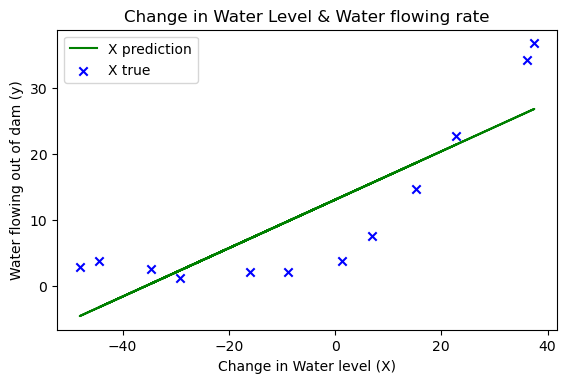

In [11]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(X,y,color = 'b',
           marker = 'x',label = 'X true')
ax.plot(X,X_preds,color = 'g',label = 'X prediction')
ax.legend()
ax.set(xlabel = 'Change in Water level (X)',
      ylabel = 'Water flowing out of dam (y)',title = 'Change in Water Level & Water flowing rate');

### Bias Variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. We will plot training and test errors on a learning curve to diagnose bias-variance problems.

In [12]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X_train,y_train,X_val,y_val):
    
    #track train and dev error
    train_errors, val_errors = [], []
    
    #create a model on subset of train and predict for val and then measure error
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    #plot errors
    fig = plt.figure(dpi = 100,figsize=(6,4))
    plt.plot(np.sqrt(train_errors), "b-+", linewidth=1, label="train error")
    plt.plot(np.sqrt(val_errors), "g-", linewidth=1, label="cross-val error")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("Mean Squarred Error")

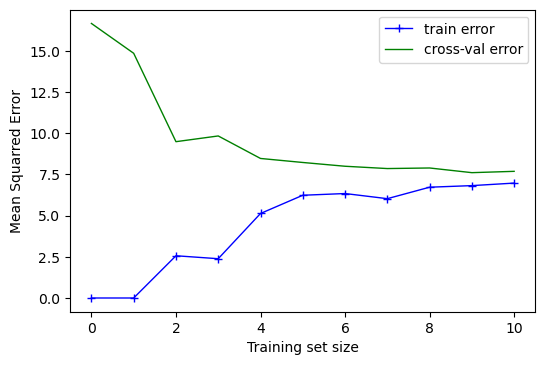

In [13]:
#model is too simple and both train and val errors are high... high bias problem
plot_learning_curves(ridge,X,y,Xval,yval)

### Polynomial Regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.

In [14]:
#let us create 5 degree polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_poly = poly.fit_transform(X)

In [15]:
#now fit this new x to ridge model with 0 regularization
#using normalization because now we have more dimension

ridge = Ridge(alpha=0,normalize=True)
ridge.fit(X_poly,y)

Ridge(alpha=0, normalize=True)

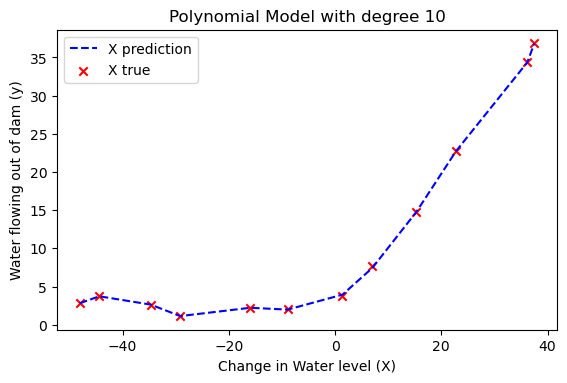

In [16]:
X_preds_poly = ridge.predict(X_poly)

fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(X,y,color = 'r',marker = 'x',label = 'X true')

cache = sorted(list(zip(X,X_preds_poly)))
X_temp  = list(zip(*cache))[0]
y_temp = list(zip(*cache))[1]
ax.plot(X_temp,y_temp,color = 'b',ls = '--',label = 'X prediction')

ax.legend()
ax.set(xlabel = 'Change in Water level (X)',
      ylabel = 'Water flowing out of dam (y)',title = 'Polynomial Model with degree 10');

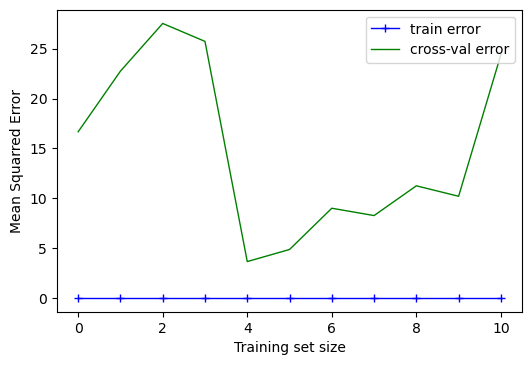

In [17]:
Xvalpoly = poly.transform(Xval)

plot_learning_curves(ridge,X_poly,y,Xvalpoly,yval)

`Looking at above two plots, we can see that model is badly overfitting, one way to handle high variance is regularize model. Let us see by trying different value of lambda.`

### Adjusting the regularization parameter

In [18]:
#let us try lambda = 0.1

ridge = Ridge(alpha=0.3,normalize=True)
ridge.fit(X_poly,y)

Ridge(alpha=0.3, normalize=True)

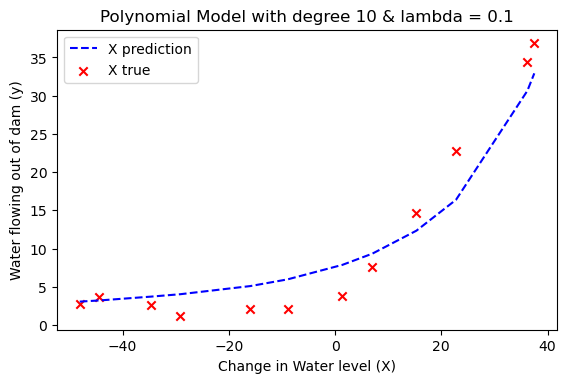

In [19]:
X_preds_poly = ridge.predict(X_poly)

fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(X,y,color = 'r',marker = 'x',label = 'X true')

cache = sorted(list(zip(X,X_preds_poly)))
X_temp  = list(zip(*cache))[0]
y_temp = list(zip(*cache))[1]
ax.plot(X_temp,y_temp,color = 'b',ls = '--',label = 'X prediction')

ax.legend()
ax.set(xlabel = 'Change in Water level (X)',
      ylabel = 'Water flowing out of dam (y)',
       title = 'Polynomial Model with degree 10 & lambda = 0.1');

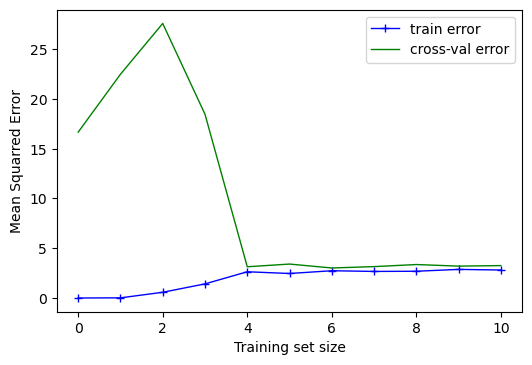

In [20]:
plot_learning_curves(ridge,X_poly,y,Xvalpoly,yval)

`Now model is neither suffering from high bias nor high variance.`

In [21]:
# let us try lambda = 100

ridge = Ridge(alpha=100,normalize=True)
ridge.fit(X_poly,y)

Ridge(alpha=100, normalize=True)

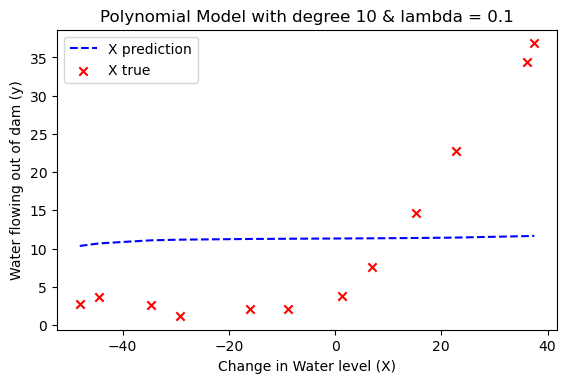

In [22]:
X_preds_poly = ridge.predict(X_poly)

fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(X,y,color = 'r',marker = 'x',label = 'X true')

cache = sorted(list(zip(X,X_preds_poly)))
X_temp  = list(zip(*cache))[0]
y_temp = list(zip(*cache))[1]
ax.plot(X_temp,y_temp,color = 'b',ls = '--',label = 'X prediction')

ax.legend()
ax.set(xlabel = 'Change in Water level (X)',
      ylabel = 'Water flowing out of dam (y)',
       title = 'Polynomial Model with degree 10 & lambda = 0.1');

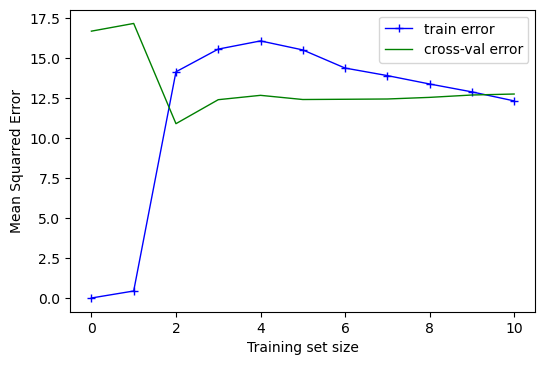

In [23]:
plot_learning_curves(ridge,X_poly,y,Xvalpoly,yval)

`Look now, model is too simple and it is even not able to capture trend in data.`

### Trying different lambda value

In [24]:
lambda_vals = [0, 0.001,0.3, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
train_errors = []
val_errors = []

for alpha in lambda_vals:
    ridge = Ridge(alpha=alpha,normalize=True)
    
    ridge.fit(X_poly,y)
    
    train_preds = ridge.predict(X_poly)
    val_pred = ridge.predict(Xvalpoly)
    
    train_error = mean_squared_error(y,train_preds)
    val_error = mean_squared_error(yval,val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

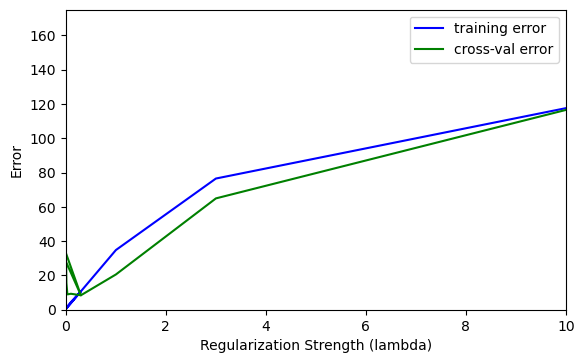

In [25]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.plot(lambda_vals,train_errors,color = 'b',ls = '-',label = 'training error')
ax.plot(lambda_vals,val_errors,color = 'g',ls = '-',label = 'cross-val error')

ax.set_xlim(0,10,0.01)
ax.set_ylim(0,175)

ax.legend()
ax.set(xlabel = 'Regularization Strength (lambda)',
      ylabel = 'Error');

`Around alpha = 0.3, it is giving best possible model..`

### Computing test set error

In [26]:
final_model = Ridge(alpha = 0.3,normalize=True)
final_model.fit(X_poly,y)

Ridge(alpha=0.3, normalize=True)

In [27]:
train_preds = final_model.predict(X_poly)
val_preds = final_model.predict(Xvalpoly)

Xtestpoly = poly.transform(Xtest)
test_preds = final_model.predict(Xtestpoly)

In [28]:
train_error = mean_squared_error(y,train_preds)
val_error = mean_squared_error(yval,val_preds)
test_error = mean_squared_error(ytest,test_preds)

print("Training Error:",train_error)
print("Validation Error:",val_error)
print("Test Error:",test_error)

Training Error: 10.727198654313653
Validation Error: 8.428765119772496
Test Error: 7.679198662392956
